# 📘基于 MindSpore 和Deepseek的Agent+RAG问答系统
DeepSeek，全称杭州深度求索人工智能基础技术研究有限公司。DeepSeek是一家创新型科技公司，成立于2023年7月17日，使用数据蒸馏技术，得到更为精炼、有用的数据。由知名私募巨头幻方量化孕育而生，专注于开发先进的大语言模型（LLM）和相关技术。注册地址：浙江省杭州市拱墅区环城北路169号汇金国际大厦西1幢1201室。法定代表人为裴湉，经营范围包括技术服务、技术开发、软件开发等。
2024年1月5日至6月，相继发布DeepSeek LLM、DeepSeek-Coder、DeepSeekMath、DeepSeek-VL、DeepSeek-V2、DeepSeek-Coder-V2模型。2024年9月5日，更新API支持文档，宣布合并DeepSeek Coder V2和DeepSeek V2 Chat，推出DeepSeek V2.5。12月13日，发布DeepSeek-VL2。12月26日，正式上线DeepSeek-V3首个版本并同步开源。
本项目的核心在于将 DeepSeek 的先进语言模型应用于实际场景，具体而言，通过处理和解析 MindSpore 的设计概览 PDF 文档，构建一个智能问答系统。​这不仅展示了大语言模型在专业领域文档理解和信息提取方面的能力，也为开发者提供了一个范例，说明如何将预训练模型与特定领域知识相结合，构建高效的问答系统。

## ✅ Step 1：安装依赖包
MindNLP是一个基于MindSpore深度学习框架开发的开源自然语言处理(NLP)库。它为解决各种NLP任务提供了一个强大的平台,包含了许多常用的NLP方法和模型。MindNLP的目标是帮助研究人员和开发者更方便快捷地构建和训练NLP模型。
本项目主要基于Mindnlp和Mindspore进行开发。
首先安装依赖库

In [6]:
!pip install pymupdf sentence-transformers faiss-cpu mindspore mindnlp newspaper3k lxml[html_clean]

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple/


## ✅ Step 2：RAG——加载 PDF 文档

## RAG介绍
大语言模型在智能交互、语言理解等方面都展现出了强大能力，然而在实际业务场景中，通用的基础语言大模型往往难以满足特定的业务需求。
大模型的知识来源受限于其训练数据，目前主流的大模型，如ChatGPT、文心一言、通义千问等，其训练集主要基于网络公开数据。意味着它们往往难以获取实时、非公开或离线数据中的知识，从而限制了模型在某些专业领域的应用。
同时大模型可能面临幻觉问题，由于所有AI模型的底层原理都基于数学概率，大模型的输出实质上是一系列数值运算的结果。在某些情况下，这可能导致模型在不擅长的场景或缺乏相关知识时产生误导性的回答。这种幻觉问题的识别需要使用者具备相应领域的知识，从而限制了使用的效果。
再者，数据安全性也是现代社会关注的焦点。在利用大模型处理企业数据时，数据泄露的风险不容忽视。因此，许多企业或者个人用户不愿将私域数据上传至第三方平台进行训练，这在一定程度上限制了通用大模型在实际业务中的应用。

为了解决上述问题，检索增强生成（Retrieval Augmented Generation ，RAG）技术应运而生。
RAG技术结合了信息检索与自然语言生成，通过从大量文档中检索相关信息来增强大模型的生成能力。在实际操作中，RAG系统会先依据用户的查询需求，在庞大的知识库中迅速定位并检索到高度相关的文档。随后，系统会精心提炼这些文档中的宝贵知识，将其巧妙地融入用户输入文本之中，一同传递给大模型。这一过程不仅为大模型提供了丰富的可参考背景知识，还大幅提升了生成内容的准确性和针对性。
大语言模型在智能交互、语言理解等方面都展现出了强大能力，然而在实际业务场景中，通用的基础语言大模型往往难以满足特定的业务需求。

大模型的知识来源受限于其训练数据，目前主流的大模型，如ChatGPT、文心一言、通义千问等，其训练集主要基于网络公开数据。意味着它们往往难以获取实时、非公开或离线数据中的知识，从而限制了模型在某些专业领域的应用。
同时大模型可能面临幻觉问题，由于所有AI模型的底层原理都基于数学概率，大模型的输出实质上是一系列数值运算的结果。在某些情况下，这可能导致模型在不擅长的场景或缺乏相关知识时产生误导性的回答。这种幻觉问题的识别需要使用者具备相应领域的知识，从而限制了使用的效果。

再者，数据安全性也是现代社会关注的焦点。在利用大模型处理企业数据时，数据泄露的风险不容忽视。因此，许多企业或者个人用户不愿将私域数据上传至第三方平台进行训练，这在一定程度上限制了通用大模型在实际业务中的应用。

为了解决上述问题，检索增强生成（Retrieval Augmented Generation ，RAG）技术应运而生。

RAG技术结合了信息检索与自然语言生成，通过从大量文档中检索相关信息来增强大模型的生成能力。在实际操作中，RAG系统会先依据用户的查询需求，在庞大的知识库中迅速定位并检索到高度相关的文档。随后，系统会精心提炼这些文档中的宝贵知识，将其巧妙地融入用户输入文本之中，一同传递给大模型。这一过程不仅为大模型提供了丰富的可参考背景知识，还大幅提升了生成内容的准确性和针对性。

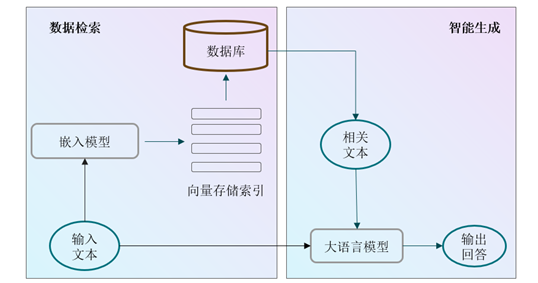

RAG的核心架构可以概括为“数据检索+智能生成”。在“数据检索”环节，依赖向量数据库技术，利用其高效的数据存储与检索机制，迅速锁定目标知识；而在“智能生成”阶段，则借助大模型和精细的提示工程技术，将检索到的知识精准利用，最终生成符合需求的答案。本课题中任务场景涉及的交通系统场景属于细分领域，基于RAG技术获取相关行业背景知识以及对大语言模型进行辅助，可以帮助大语言模型做出更合理的决策，辅助事故的分析与处理。

## 文档链接： https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/white_paper/MindSpore_white_paperV1.1.pdf
本项目使用的pdf文档下载链接如上，下载到同目录后改名为如 MindSpore_Design_Overview.pdf，与下方代码相同

In [10]:
import fitz  # PyMuPDF
pdf_path = 'MindSpore_Design_Overview.pdf'  # 需提前下载该文档

doc = fitz.open(pdf_path)
pdf_text = [page.get_text() for page in doc]

## ✅ Step 3：清洗 PDF 文本

In [11]:
import pandas as pd
def clean_text(text):
    return ' '.join(text.split())
pdf_df = pd.DataFrame({
    'page': list(range(1, len(pdf_text)+1)),
    'text': [clean_text(t) for t in pdf_text]
})

## ✅ Step 4：切分为语义块

In [12]:
chunks = []
for _, row in pdf_df.iterrows():
    text = row['text']
    for i in range(0, len(text), 300):
        chunk = text[i:i+300]
        chunks.append(chunk)

## ✅ Step 5：向量化并构建 FAISS 检索器

由于一般情况下加载的文档字符较多，常常会达到千位万位的数量级，如果大语言模型直接处理整个文档，可能会在分析过长的文本时遇到困难，难以准确抓取苏姚的信息。为有效应对这一挑战，可以需要采取分割策略，将庞大的文档细化为若干小文本块。如此一来，在需要时，我们便可以灵活地调用相关文档片段，从而提升信息处理的准确性和效率。本课题中也将文档切成包含更小数量级的段落，并且每个段落间也有部分字符重叠，确保一个观点的相关背景信息不会因为切分被遗漏。

向量化是一个将文本数据转化为向量矩阵的过程，将每个文本块的内容换成向量，并将这些向量存储在向量数据库中，从而实现索引，方便程序在运行时可以快速检索到相关那内容。向量化的模型众多，Openai的ChatGPT-Embedding、百度的ERNIE-Embedding V1以及北京智源人工智能研究院的BGE模型都是目前主流的开源转换模型。

数据向量化后，构建索引并将其写入数据库的过程，简称为“数据入库”。在RAG场景下，有多种数据库可供选择，例如FAISS、Chromadb、Elasticsearch以及Milvus等。在选择适合的数据库时，应全面考虑业务的具体需求、硬件配置以及性能要求等诸多因素，以确保选出最适合的数据库方案。本项目采用较通用常见的FAISS数据库进行数据入库操作。


In [15]:
### 建议下载到本地部署，比较快，可以从魔塔下载或者昇思平台
!git lfs install
!git clone https://www.modelscope.cn/Ceceliachenen/paraphrase-multilingual-MiniLM-L12-v2.git

Git LFS initialized.
正克隆到 'paraphrase-multilingual-MiniLM-L12-v2'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 1), reused 0 (delta 0), pack-reused 0
接收对象中: 100% (25/25), 6.97 MiB | 10.62 MiB/s, 完成.
处理 delta 中: 100% (1/1), 完成.
过滤内容: 100% (3/3), 902.81 MiB | 36.37 MiB/s, 完成.


In [16]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

embed_model = SentenceTransformer('./paraphrase-multilingual-MiniLM-L12-v2')
chunk_embeddings = embed_model.encode(chunks)

index = faiss.IndexFlatL2(chunk_embeddings.shape[1])
index.add(np.array(chunk_embeddings))

/home/mindspore/miniconda/envs/jupyter/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## ✅ Step 6：定义检索接口

In [17]:
def query_pdf(query, top_k=3):
    q_vec = embed_model.encode([query])
    D, I = index.search(np.array(q_vec), top_k)
    return [chunks[i] for i in I[0]]

## ✅ Step 7：加载 Deepseek 模型
本项目使用小规模蒸馏模型

基于Mindspore框架和Mindnlp库开发安装还是很方便的

In [18]:
from mindnlp.transformers import AutoModelForCausalLM, AutoTokenizer
import mindspore as ms

tokenizer = AutoTokenizer.from_pretrained('MindSpore-Lab/DeepSeek-R1-Distill-Qwen-7B', mirror='modelers', ms_dtype=ms.float16)
model = AutoModelForCausalLM.from_pretrained('MindSpore-Lab/DeepSeek-R1-Distill-Qwen-7B', mirror='modelers', ms_dtype=ms.float16)
model.set_train(False)

def qwen_generate(prompt):
    messages = [{"role": "user", "content": prompt}]
    text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    inputs = tokenizer([text], return_tensors="ms")
    outputs = model.generate(**inputs, max_new_tokens=256)
    output = [o[len(i):] for i, o in zip(inputs.input_ids, outputs)]
    return tokenizer.batch_decode(output, skip_special_tokens=True)[0]

[WARNING] ME(33:281473002876960,MainProcess):2025-03-28-15:16:37.930.672 [mindspore/context.py:1335] For 'context.set_context', the parameter 'ascend_config' will be deprecated and removed in a future version. Please use the api mindspore.device_context.ascend.op_precision.precision_mode(),
                                                       mindspore.device_context.ascend.op_precision.op_precision_mode(),
                                                       mindspore.device_context.ascend.op_precision.matmul_allow_hf32(),
                                                       mindspore.device_context.ascend.op_precision.conv_allow_hf32(),
                                                       mindspore.device_context.ascend.op_tuning.op_compile() instead.


  0%|          | 0.00/3.00k [00:00<?, ?B/s]

  0%|          | 0.00/6.71M [00:00<?, ?B/s]

  0%|          | 0.00/680 [00:00<?, ?B/s]

  0%|          | 0.00/27.4k [00:00<?, ?B/s]

  0%|          | 0.00/8.02G [00:00<?, ?B/s]

  0%|          | 0.00/6.17G [00:00<?, ?B/s]

Qwen2ForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`.`PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


[MS_ALLOC_CONF]Runtime config:  enable_vmm:True  vmm_align_size:2MB


Sliding Window Attention is enabled but not implemented for `eager`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0.00/181 [00:00<?, ?B/s]

## ✅ Step 8：集成工具：时间、翻译、网页摘要

在人类历史的长河中，对工具的创造和使用无疑展现了我们的智慧与创新能力。自人类文明出现以来，工具一直是我们生存的本质所不可或缺的一部分。工具是人类能力的扩展，旨在提高人类活动的生产力、效率和解决问题的能力。随着工具的进步，我们可以轻松高效地完成日益复杂的任务，从而解放时间和资源，以追求更宏伟的目标。

大语言模型拥有丰富的社会经验与基础知识，在理解和生成自然语言文本方面表现优异，但由于大模型预训练数据的滞后性以及私域数据的使用限制，再加上大语言模型存在的幻觉问题，有时基于RAG也很难满足所有需求，因此类似于人类发展，大模型也需要借助工具来与外部世界交互或者实现动态功能。

借助工具，不仅可以打破传统静态文本处理的限制，使得模型能够根据实时数据和信息来生成更加准确和有用的输出，还能够与其他先进技术进行无缝集成，例如机器学习算法、图像处理或数据分析工具等，从而提供更加全面和深入的服务。总的来说，工具调用为大语言模型赋予了更强的交互性和实用性，使其能够成为真正意义上的智能助手，帮助人类解决各种复杂问题。

因此，本项目也集成了一些基本工具供LLM调用，构建一个能执行任务的智能体，扩展性更强。

In [21]:
from datetime import datetime

def get_time_info(query):
    now = datetime.now()
    if "几点" in query:
        return f"现在是 {now.strftime('%H:%M:%S')}"
    elif "星期" in query:
        return f"今天是星期{now.isoweekday()}"
    elif "几号" in query or "日期" in query:
        return f"今天是 {now.strftime('%Y-%m-%d')}"
    return "我可以告诉你时间哦~"

def translate(query):
    if "翻译" in query:
        target = "英文" if "英文" in query else "中文"
        content = query.replace("翻译", "").replace("成英文", "").replace("成中文", "")
        return qwen_generate(f"请将以下内容翻译成{target}：{content}")
    return "翻译请求格式不清晰。"

from newspaper import Article

def summarize_web(url):
    try:
        article = Article(url, language='zh')
        article.download()
        article.parse()
        return qwen_generate("请总结以下网页内容：" + article.text[:2000])
    except Exception as e:
        return f"❌ 网页摘要失败：{e}"

## ✅ Step 9：Agent 路由控制器

In [22]:
class PDFAgent:
    def answer(self, query):
        if any(k in query for k in ["计算", "+", "-", "*", "/"]):
            return qwen_generate(f"请计算：{query}")
        elif any(k in query for k in ["几点", "星期", "几号"]):
            return get_time_info(query)
        elif "翻译" in query:
            return translate(query)
        elif query.startswith("http"):
            return summarize_web(query)
        else:
            retrieved = "\n".join(query_pdf(query))
            return qwen_generate(f"以下是相关资料：{retrieved}\n请回答：{query}")

agent = PDFAgent()

## ✅ Step 10：测试示例

#### RAG知识库背景下的问答示例

In [23]:
print(agent.answer("什么是MindSpore？"))

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
[WARNING] PRE_ACT(33,fff93e7cf120,python):2025-03-28-15:24:39.494.750 [mindspore/ccsrc/backend/common/mem_reuse/mem_dynamic_allocator.cc:721] FreeIdleMemsByEagerFree] Eager free count : 2, free memory : 30293298176, real free : 15441330176, not free size: 14851968000.


..嗯，我现在需要回答关于MindSpore的问题。首先，我得仔细阅读提供的资料，了解MindSpore的基本信息。资料里提到MindSpore是一种全场景覆盖的深度学习计算框架，目标是易开发、高效执行和全场景覆盖。它使用了源码转换（SCT）的自动微分机制，将函数转换为中间表达（IR），构建计算图，并应用软硬件协同优化。此外，它支持流程控制的自动微分，方便构建复杂的模型，同时还能进行静态编译优化，性能良好。

接下来，资料还提到MindSpore的自动微分机制是基于符号微分的，因为它使用了函数式的中间表达，与复合函数有直观的对应关系。每个原语操作对应基础函数，可以构建复杂的流程控制。

然后，框架由MindExpression、MindCompiler、MindData、MindRE和MindArmour五个主要组件组成。表1总结了技术贡献，但具体内容没有给出。

现在，我需要回答什么是MindSpore。根据资料，MindSpore是一个深度学习框架，重点在易开发、高效执行和全场景覆盖。它通过源码转换和自动微分，构建计算图，优化性能，并支持静态


#### 简单工具调用的示例

In [24]:
print(agent.answer("现在几点？"))

现在是 15:26:09


#### 简单工具调用的示例

In [25]:
print(agent.answer("翻译成英文：你好，我是AI助手"))

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


好，用户让我将“你好，我是AI助手”翻译成英文。首先，我需要理解这句话的意思。这句话通常用于自我介绍，可能是在社交媒体、应用或聊天软件中使用。

“你好，我是AI助手”中的“你好”是中文常用的问候语，翻译成英文时可以用“Hello”或者“Hi”。考虑到语气比较友好，用“Hello”更合适。

接下来，“我是AI助手”这部分需要准确传达AI助手的身份。直接翻译的话是“I am an AI Assistant”，这样既清晰又直接，符合正式和半正式的场合。

组合起来就是“Hello, I am an AI Assistant.” 这样翻译既保留了原句的友好语气，又准确地传达了AI助手的身份。

另外，考虑到用户可能是在进行某种自动化回复，比如在应用或网站中设置消息回复功能，确保翻译准确无误是非常重要的，避免误解或错误的信息传递。

所以，最终的翻译应该是：“Hello, I am an AI Assistant.”
</think>

Hello, I am an AI Assistant.
